Projet : Accident de la route
==============

## Etape 2 : Pré-processing



### Import des données

In [159]:
# import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# librairie pour afficher toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)
pd.options.display.max_info_columns

100

In [160]:
# import du dataset
df = pd.read_csv("dataset/dataset_to_prepro.csv")
df.head()

/tmp/ipykernel_631350/2666441893.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset/dataset_to_prepro.csv")


,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,16:15,1,26,26198,2,3,1,3,"44,5594200000","4,7257200000",1,2,0,2,1,9,1,2022
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,16:15,1,26,26198,2,3,1,3,"44,5594200000","4,7257200000",1,7,0,2,2,1,1,2022
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,08:34,1,25,25204,2,3,1,3,"46,9258100000","6,3462000000",2,7,0,2,8,15,1,2022
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,08:34,1,25,25204,2,3,1,3,"46,9258100000","6,3462000000",2,10,0,2,1,1,1,2022
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,17:15,1,22,22360,2,6,1,2,"48,4931620000","-2,7604390000",2,7,0,2,1,2,1,2022


## Pré-processing des données

A cette étape, nous avons commencé par transformer les données qui contiennent du texte et des erreurs en variables numériques.

#### Transformation en variable numérique

In [161]:
# variables non numériques
df.select_dtypes(exclude='number').columns

Index(['nbv', 'hrmn', 'dep', 'com', 'lat', 'long'], dtype='object')

In [162]:
# nbv : nombre de voies de circulation
print("Avant traitement :", df.nbv.unique())

# Convertir toutes les valeurs en chaînes de caractères
df['nbv'] = df['nbv'].replace([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                      ['-1','0','1','2', "3", '4', '5', '6', '7', '8', '9', '10', '11', '12'])

# enlever l'espace avant la négation
df['nbv'] = df['nbv'].str.replace(' -1', '-1')

# remplacer les #ERREUR en 13
df['nbv'] = df['nbv'].str.replace('#ERREUR', '13')

df["nbv"] = df["nbv"].astype(int)

# vérification de la répartition
print("Après préprocessing :", df.nbv.unique())
df.nbv.value_counts()

Avant traitement : [2 1 4 3 6 0 9 8 -1 5 7 12 10 '4' '1' '2' '5' '3' '6' '0' '8' ' -1' '9'
 '10' '7' '12' '#ERREUR' '11' 11]
Après préprocessing : [ 2  1  4  3  6  0  9  8 -1  5  7 12 10 13 11]


nbv
 2     294193
 4      63139
 1      46679
 3      41387
 6      14756
 0      11360
 5       9203
-1       4785
 8       4780
 7       1598
 10      1127
 9        740
 12       240
 11       193
 13         2
Name: count, dtype: int64

In [163]:
# dep : département

# remplacer les dpt 2A et 2B de la Corse par 20
df['dep'] = df['dep'].str.replace('2A', '20')
df['dep'] = df['dep'].str.replace('2B', '20')

df["dep"] = df["dep"].astype(int)

# vérification de la répartition
df["dep"].unique()

array([ 26,  25,  22,  16,  13,  12,  10,   9,   6,   3,   2,  75,  94,
        93,  92,  76,  68, 972,  63,  62,  51,  20,  65,  33,  71,  89,
        61,  29,  38,  14,  60,  45,  73,  53,  24,  27,  17,  48, 973,
        77,  67, 988,   8,  56,  69,  91,  78,  64,  59,  49,  42,  37,
        34,  32,  31,  11,  35,  47,  86,   1,  74,  79,  46,  39,  72,
         5,  18,  19, 971, 987,  66,  84,  85,  95,  57,  54,  52,  50,
        44, 974,  83,  28,  15,   7,  80,  30,  41,  82,  55,  43,  40,
         4, 986,  88,  36,  87,  21, 976,  81,  58,  70,  90,  23, 977,
       978, 975])

In [164]:
# com : commune

# remplacer les communes de la Corse par 20
df['com'] = df['com'].str.replace('B', '0')
df['com'] = df['com'].str.replace('A', '0')

# remplacer le N/C par la commune correspondante : 14061
df['com'] = df['com'].str.replace('N/C', '14061')

df["com"] = df["com"].astype(int)

# vérification de la répartition
df["com"].unique()

array([26198, 25204, 22360, ..., 25522, 17063, 85099])

In [165]:
# lat : latitude

# Convertir toutes les valeurs en chaînes de caractères
df["lat"] = [str(value) for value in df["lat"]]

# remplacer les virgules par des points
df["lat"] = [value.replace(',', '.') for value in df["lat"]]

df["lat"] = df["lat"].astype(float)

In [166]:
# long : longitude

# Convertir toutes les valeurs en chaînes de caractères
df["long"] = [str(value) for value in df["long"]]

# remplacer les virgules par des points
df["long"] = [value.replace(',', '.') for value in df["long"]]

df["long"] = df["long"].astype(float)

### Création de nouvelles colonnes

In [167]:
# hrnm : heures et minutes

# séparer les heures des minutes
sepa_values = [value.split(':') for value in df["hrmn"] ]

# création de la variable heure et la variable minute
df["heure"] = [value[0] for value in sepa_values]
df["minute"] = [value[1] for value in sepa_values]

df["heure"] = df["heure"].astype(int)
df["minute"] = df["minute"].astype(int)

# suppression de la variable hrmn
df = df.drop(["hrmn"], axis=1)
df.head()

,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,2,0,2,1,9,1,2022,16,15
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,7,0,2,2,1,1,2022,16,15
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,7,0,2,8,15,1,2022,8,34
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,10,0,2,1,1,1,2022,8,34
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,1,22,22360,2,6,1,2,48.493162,-2.760439,2,7,0,2,1,2,1,2022,17,15


In [168]:
# création d'une tranche d'age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] # 1: 0 à 10, 2: 21-30, '3: 31-40, 4: 41-50, 5: 51-60, 6: 61-70, 7: 70 et plus


df['age'] = df['an'] - df['an_nais']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_group'] = df['age_group'].replace([7, 8, 9, 10, 11, 12, 13], 7)

df.head()

/tmp/ipykernel_631350/3150088136.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['age_group'] = df['age_group'].replace([7, 8, 9, 10, 11, 12, 13], 7)


,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute,age,age_group
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,2,0,2,1,9,1,2022,16,15,14.0,2
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,7,0,2,2,1,1,2022,16,15,74.0,7
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,7,0,2,8,15,1,2022,8,34,34.0,4
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,10,0,2,1,1,1,2022,8,34,52.0,6
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,1,22,22360,2,6,1,2,48.493162,-2.760439,2,7,0,2,1,2,1,2022,17,15,20.0,3


In [169]:
# création d'une tranche horaire

bins = [1, 5, 7, 10, 13, 16, 19, 22]
labels = [100, 200, 300, 400, 500, 600, 700]

df['h_group'] = pd.cut(df['heure'], bins=bins, labels=labels, right=False)
df['h_group'] = df['h_group'].replace([100, 200, 300, 400, 500, 600, 700], [1, 2, 3, 4, 5, 6, 7])

df.head()

/tmp/ipykernel_631350/18072282.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['h_group'] = df['h_group'].replace([100, 200, 300, 400, 500, 600, 700], [1, 2, 3, 4, 5, 6, 7])


,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute,age,age_group,h_group
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,2,0,2,1,9,1,2022,16,15,14.0,2,6
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,7,0,2,2,1,1,2022,16,15,74.0,7,6
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,7,0,2,8,15,1,2022,8,34,34.0,4,3
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,10,0,2,1,1,1,2022,8,34,52.0,6,3
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,1,22,22360,2,6,1,2,48.493162,-2.760439,2,7,0,2,1,2,1,2022,17,15,20.0,3,6


In [170]:
# Travail sur les dates

# mois
df.mois.value_counts()

print("corrélation entre les mois et la gravité :",np.corrcoef(df['mois'], df['grav']))

# jour
df.jour.value_counts()

print("corrélation entre les jours et la gravité :", np.corrcoef(df['jour'], df['grav']))

corrélation entre les mois et la gravité : [[ 1.000000e+00 -2.902773e-04]
 [-2.902773e-04  1.000000e+00]]
corrélation entre les jours et la gravité : [[ 1.00000000e+00 -5.72081263e-05]
 [-5.72081263e-05  1.00000000e+00]]


En ce qui concerne les mois et le jour de l'accident, la corrélation est très faible entre la gravité et le mois et le jour, indiquant une relation linéaire très faible entre ces variables. De plus il n'y a pas de différences significatives sur la quantité d'accidents en fonction des mois ou des jours. 

In [171]:
df['date_obj'] = pd.to_datetime(df['an'].astype(str) + '-' + df['mois'].astype(str) + '-' + df['jour'].astype(str))

df['weekday'] = df['date_obj'].apply(lambda x: x.weekday())

df.head()

,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute,age,age_group,h_group,date_obj,weekday
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,2,0,2,1,9,1,2022,16,15,14.0,2,6,2022-10-19,2
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,7,0,2,2,1,1,2022,16,15,74.0,7,6,2022-10-19,2
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,7,0,2,8,15,1,2022,8,34,34.0,4,3,2022-10-20,3
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,10,0,2,1,1,1,2022,8,34,52.0,6,3,2022-10-20,3
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,1,22,22360,2,6,1,2,48.493162,-2.760439,2,7,0,2,1,2,1,2022,17,15,20.0,3,6,2022-10-20,3


Dans cet exemple, la colonne 'weekday' contiendra un nombre entier qui représente le jour de la semaine :

    0 pour lundi
    1 pour mardi
    2 pour mercredi
    3 pour jeudi
    4 pour vendredi
    5 pour samedi
    6 pour dimanche

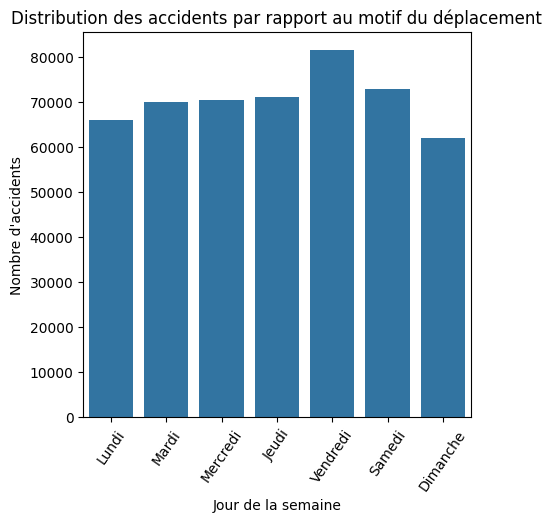

In [172]:
plt.figure(figsize= (5, 5))
sns.countplot(x = df['weekday'])
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre d'accidents")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Lundi', 'Mardi', "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"], rotation=55)
plt.title('Distribution des accidents par rapport au motif du déplacement')
plt.show();

### Regroupement de catégories

In [173]:
# trajet : transformer les non concerné en non renseigné
df['trajet'] = df['trajet'].mask(df['trajet'] < 0, 0)

# locp : regroupement de catégorie entre elles
df['locp'] = df['locp'].replace([2, 4], # 1 et 2 => 1 pour piéton sur chaussé
                                [1, 2]) # 3 et 4 => 2 pour piéton sur passage piéton

df['locp'] = df['locp'].replace([5,6,7,8,9], 3) # 5 à 9 => 3 pour piéton sur divers

# regrouper le nb de voies supérieur à 9 en une variable : plus de 9                                  
df['nbv'] = df['nbv'].replace([9,10,11,12,13], 9) # 9 à 13 => 9 pour plus de 9 voies

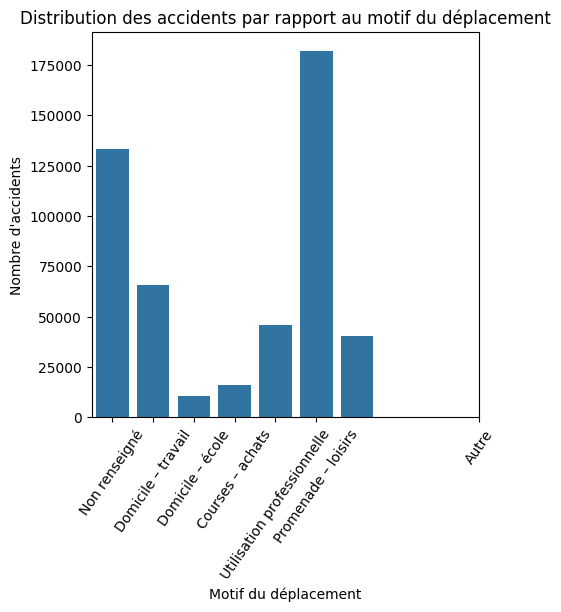

In [174]:
plt.figure(figsize= (5, 5))
sns.countplot(x = df['trajet'])
plt.xlabel("Motif du déplacement")
plt.ylabel("Nombre d'accidents")
plt.xticks([0, 1, 2, 3, 4, 5, 9], ['Non renseigné', 'Domicile – travail', "Domicile – école", "Courses – achats", "Utilisation professionnelle", "Promenade – loisirs", "Autre"], rotation=55)
plt.title('Distribution des accidents par rapport au motif du déplacement')
plt.show();

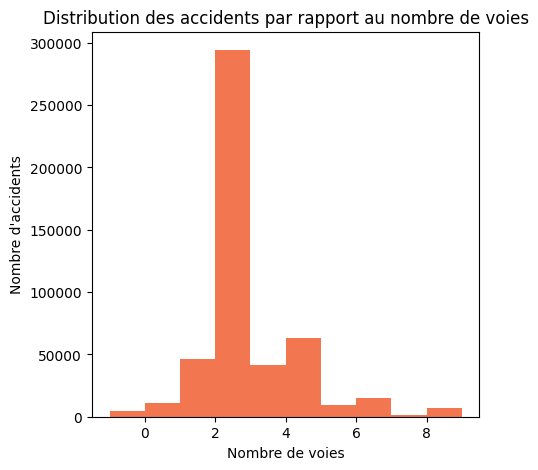

In [175]:
plt.figure(figsize= (5, 5))
plt.hist(df['nbv'],  color = ['#f27750'], label = ['nbv'])

plt.xlabel("Nombre de voies")
plt.ylabel("Nombre d'accidents")
plt.title('Distribution des accidents par rapport au nombre de voies')
plt.show();

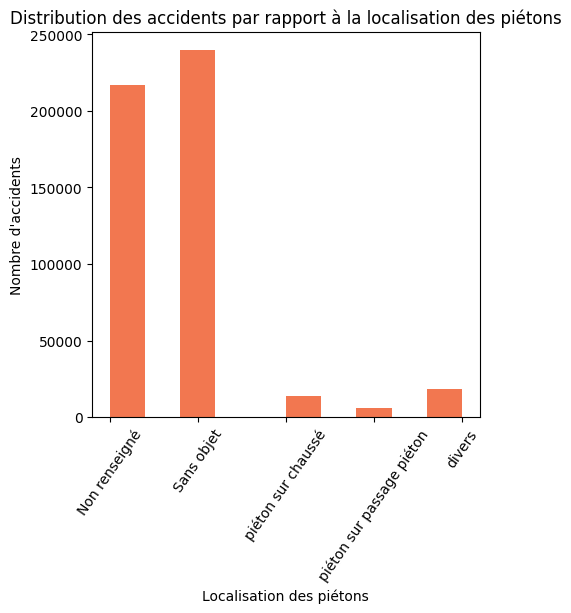

In [176]:
plt.figure(figsize= (5, 5))
plt.hist(df['locp'],  color = ['#f27750'], label = ['locp'])

plt.xlabel("Localisation des piétons")
plt.ylabel("Nombre d'accidents")
plt.xticks([-1, 0, 1, 2, 3], ['Non renseigné', 'Sans objet', "piéton sur chaussé", "piéton sur passage piéton", "divers"], rotation=55)
plt.title('Distribution des accidents par rapport à la localisation des piétons')
plt.show();

In [177]:
# mode de déplacement

# marche = 0
df['catv'] = df['catv'].mask(df['catv'] < 0, 0)

# edpm : trotinette électriques, monoroues, gyropodes, etc = 1
df['catv'] = df['catv'].replace([50, 60, 41, 42, 43], 100)

# vélo = 2
df['catv'] = df['catv'].replace([1, 80], 200)

# 2RM = 3
df['catv'] = df['catv'].replace([2, 4, 5, 6, 30, 31, 32, 33, 34, 35, 36], 300)

# VT (transports en commun) = 4
df['catv'] = df['catv'].replace([18, 19, 37, 38, 39, 40], 400)

# VU (véhicule utilitaire) et PL = 5
df['catv'] = df['catv'].replace([10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 99], 500)

# VL (voiture)  = 6
df['catv'] = df['catv'].replace([3, 7, 8, 9], 600)

df['catv'] = df['catv'].replace([100, 200, 300, 400, 500, 600], [1, 2, 3, 4, 5, 6])

df.catv.value_counts()

catv
6    315604
3     87270
5     49782
2     24105
1      9163
4      7184
0      1074
Name: count, dtype: int64

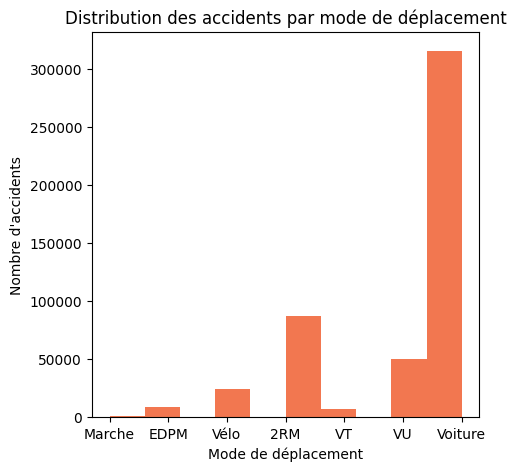

In [178]:
plt.figure(figsize= (5, 5))
plt.hist(df['catv'],  color = ['#f27750'], label = ['catv'])

plt.xlabel("Mode de déplacement")
plt.ylabel("Nombre d'accidents")
plt.xticks([0,1, 2, 3,4,5,6], ['Marche', 'EDPM', "Vélo", "2RM", "VT", "VU", "Voiture"])
plt.title('Distribution des accidents par mode de déplacement')
plt.show();

In [179]:
# présence ou absence de système de sécurité
df['secu1'] = df['secu1'].replace([1, 2, 3, 4, 5, 6, 7, 9], 1)  # présence

df['secu1'] = df['secu1'].replace([0, 8], 2)                    # absence
df['secu1'] = df['secu1'].mask(df['catv'] < 0, 2)

df.secu1.value_counts()

secu1
 1    388294
 2    100297
-1      5591
Name: count, dtype: int64

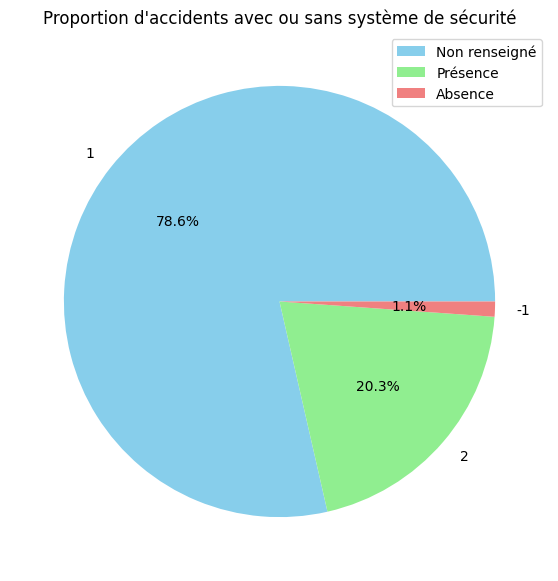

In [180]:
plt.figure(figsize=(7,7))
plt.title("Proportion d'accidents avec ou sans système de sécurité")
df.secu1.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.ylabel('')
plt.legend(labels=["Non renseigné", "Présence", "Absence"])
plt.show();

In [181]:
# place : place occupé dans le transport

# La variable "-1" correspond à "non concerné" et sont constitués de 25 lignes. Elles sont donc supprimés.
df = df.loc[df['place'] >= 1]

### Variable cible

In [182]:
print(df.grav.value_counts())

print("-1 : non concerné, 1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger")

grav
 1    207351
 4    197494
 3     75986
 2     13047
-1       279
Name: count, dtype: int64
-1 : non concerné, 1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger


Comme on a pu le voir précédemment, le jeu de données est déséquilibré sur la variable cible. Par exemple, la proportion d'accident mortel est plus faible que celle d'indemne. Pour cela nous avons combiné les variables indemne et non concerné ensemble, car si la personne n'est pas concerné par la gravité c'est qu'elle est indemne.

In [183]:
df.grav = df.grav.astype(str)
df.grav = [value.replace("-1", "1") for value in df["grav"]]

# regroupement de tué, blessé hospitalisé et blessé léger ensemble
df.grav = [value.replace("3", "2") for value in df["grav"]]
df.grav = [value.replace("4", "2") for value in df["grav"]]

df.grav = [value.replace("1", "0") for value in df["grav"]]
df.grav = [value.replace("2", "1") for value in df["grav"]]
df.grav = df.grav.astype(int)

print(df.grav.value_counts())

print("")
print("Variables d'origines :", "1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger")
print("Nouvelles variables  :", "1 – Accident sans gravité, 2 – Accident avec gravité")

grav
1    286527
0    207630
Name: count, dtype: int64

Variables d'origines : 1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger
Nouvelles variables  : 1 – Accident sans gravité, 2 – Accident avec gravité


### Matrice de corrélation

Text(0.5, 1.0, 'Variables corrélées avec la variable cible : gravité')

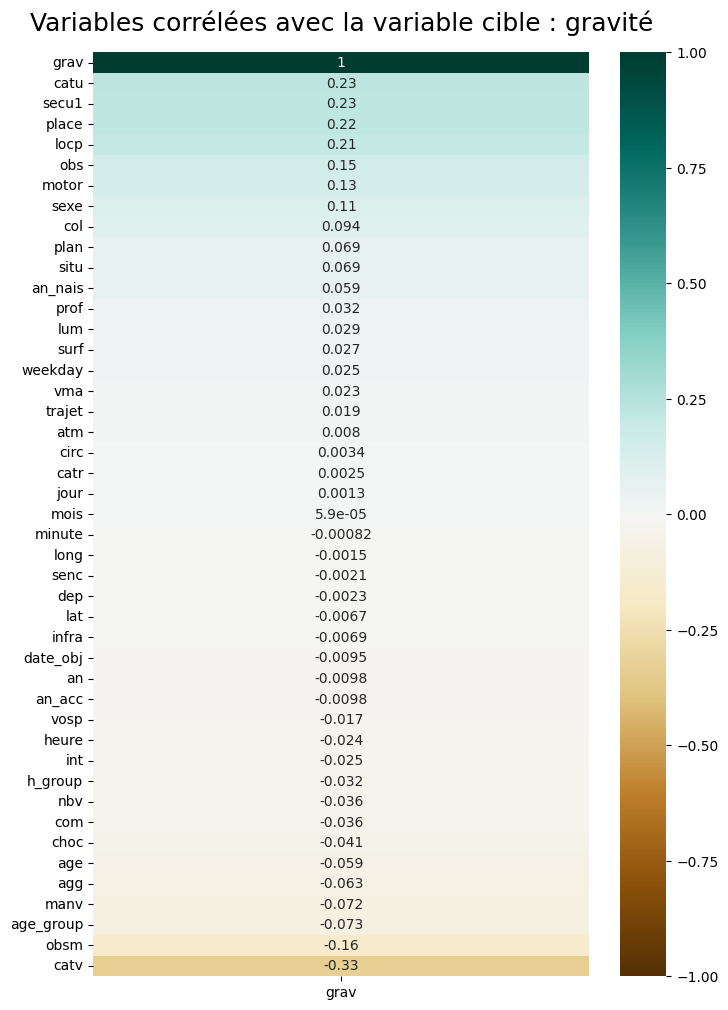

In [184]:
# corrélation avec la variable cible
sorted_corrs_t = df.corr()['grav'].abs().sort_values(ascending=False)
sorted_corrs_t

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['grav']].sort_values(by='grav', 
                                                                   ascending=False), vmin=-1, vmax=1, annot=True, 
                      cmap='BrBG')
heatmap.set_title('Variables corrélées avec la variable cible : gravité', fontdict={'fontsize':18}, pad=16)

In [185]:
df.head(1)

,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute,age,age_group,h_group,date_obj,weekday
0,1,1,1,1,2008.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.55942,4.72572,1,3,0,2,1,9,1,2022,16,15,14.0,2,6,2022-10-19,2


In [186]:
df = df.drop(["an_acc",
              "dep",  # doublon avec les variables la et long
              "mois", # doublon avec weekday
              "heure", # doublon avec tranche horaire
              "minute", # doublon avec tranche horaire
              "jour", # doublon avec weekday
              "date_obj", # doublon avec weekday
              "an_nais", # doublon avec tranche âge
              "age",     # doublon avec tranche âge
              "an"       # année de l'accident
                ], axis=1)

# Supression des lignes contenant des données manquantes
df = df.dropna()

### Sauvegarde du dataset final

In [187]:
df.to_csv('dataset/dataset_final.csv', index=False)

##### Travail en cours :

## Modélisation

### Séparation du jeu de données en train set et test set

In [ ]:

df_qua = df_ter.copy()
df_qua = df_qua.drop(['Accident_Id', 
                      "an_acc"], # doublon avec la variable "an"
                     axis=1)

df_qua = df_qua.dropna()
# Séparation du jeu de données pour entraîner le modèle
#train = df_qua.loc[df_qua.an.between(2019, 2021)] 
train = df_qua.loc[df_qua.an.between(2020, 2021)]
test = df_qua.loc[df_qua.an == 2022]

print("DF: ", df_qua.shape,"TRAIN :", train.shape,"TEST :", test.shape)
print(" ")
print("La proportion du dataset train est de", round((train.shape[0]/ df_qua.shape[0]*100)),
      "% et du dataset test est de", round((test.shape[0]/ df_qua.shape[0]*100)), "%.")
print(" ")
X_train = train.drop(["grav"], axis=1)
y_train = train.grav

X_test = test.drop(["grav"], axis=1)
y_test = test.grav

print("Séparation des labels et targets :", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

DF:  (463645, 45) TRAIN : (231476, 45) TEST : (123788, 45)
 
La proportion du dataset train est de 50 % et du dataset test est de 27 %.
 
Séparation des labels et targets : (231476, 44) (123788, 44) (231476,) (123788,)


In [ ]:
df_qua[df_qua.isna().any(axis=1)]

,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp,catr,v1,circ,nbv,vosp,prof,plan,larrout,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,heure,minute


## Réduire les écarts de dimensions

rescale les features pour réduire les écarts de dimentsions

In [ ]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler().fit(X_train)
X_train_scaled = rbs.transform(X_train)
X_test_scaled = rbs.transform(X_test)

### Standar scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_std = scaler.fit_transform(X_train)
X_test_scaled_std = scaler.transform(X_test)

### Features select

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_k = 0

for k in range(1, X_train_scaled.shape[1] + 1):
    select_k_best = SelectKBest(score_func=f_classif, k=k)
    
    X_train_k_best = select_k_best.fit_transform(X_train_scaled, y_train)
    X_test_k_best = select_k_best.transform(X_test_scaled)
    
    model_2 = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000))
    model_2.fit(X_train_k_best, y_train)
    
    y_pred = model_2.predict(X_test_k_best)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best number of features:", best_k)
print("Best accuracy:", best_accuracy)

Best number of features: 33
Best accuracy: 0.5848305166898246


In [ ]:
# /!\ Avec standar scaler

best_accuracy_std = 0
best_k_std = 0

for k in range(1, X_train_scaled_std.shape[1] + 1):
    select_k_best_std = SelectKBest(score_func=f_classif, k=k)
    
    X_train_k_best_std = select_k_best_std.fit_transform(X_train_scaled_std, y_train)
    X_test_k_best_std = select_k_best_std.transform(X_test_scaled_std)
    
    model_2_std = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000))
    model_2_std.fit(X_train_k_best_std, y_train)
    
    y_pred_std = model_2_std.predict(X_test_k_best_std)
    accuracy_std = accuracy_score(y_test, y_pred_std)
    
    if accuracy_std > best_accuracy_std:
        best_accuracy_std = accuracy_std
        best_k_std = k

print("Best number of features:", best_k_std)
print("Best accuracy:", best_accuracy_std)

Best number of features: 33
Best accuracy: 0.5848143600348984


Aucun changement avec le standar scaler.

In [ ]:
# sélection des k des meilleures features définies précédemment
test_stat =  SelectKBest(f_classif, k=33)
test_stat.fit(X_train_scaled, y_train)

for col, score in zip(X_train.columns, test_stat.scores_):
    print(col, ":", score)

X_train_selected = test_stat.transform(X_train_scaled)
X_test_selected = test_stat.transform(X_test_scaled)

place : 3751.02705471995
catu : 3932.939450001851
sexe : 663.432918581096
an_nais : 1201.3510102527455
trajet : 149.05544853172466
secu1 : 395.71118106524386
secu2 : 615.456351478097
secu3 : 1110.0055405642986
locp : 4141.429526818307
actp : 3986.073214205416
etatp : 3689.6066179078075
catr : 59.86231393996461
v1 : 3796.3966448993556
circ : 115.12844283720082
nbv : 613.280750996255
vosp : 197.0816289130131
prof : 299.7284278727152
plan : 1010.8092305804419
larrout : 79.75480586818664
surf : 74.37654817515048
infra : 3.801036830412564
situ : 1049.882785340523
vma : 452.162177423753
jour : 1.385584650158238
mois : 0.3863094406076514
an : 10.78881386395521
lum : 136.74450492455713
dep : 25.878304199677014
com : 974.4510658142017
agg : 2153.1772524713892
int : 178.16552801281452
atm : 27.788935789589
col : 1375.7678352778917
lat : 149.36146455331314
long : 9.335137534866124
senc : 9.284202599259116
catv : 2630.097827075264
obs : 3158.4853218570706
obsm : 2652.761386204269
choc : 336.370926

In [ ]:
# /!\ avec standar scaler 

# sélection des k des meilleures features définies précédemment
test_stat_std =  SelectKBest(f_classif, k=33)
test_stat_std.fit(X_train_scaled_std, y_train)

#for col, score in zip(X_train.columns, test_stat_std.scores_):
#    print(col, ":", score)

X_train_selected_std = test_stat_std.transform(X_train_scaled_std)
X_test_selected_std = test_stat_std.transform(X_test_scaled_std)

## Baseline

In [ ]:
from sklearn.dummy import DummyClassifier

for strategy in ['stratified','most_frequent','prior',
               'uniform']:
    model_dummy = DummyClassifier(strategy = strategy)
    model_dummy.fit(X_train_selected, y_train)
    
    print("The %s's accuracy is %f"%(strategy,model_dummy.score(X_test_selected, y_test)))



The stratified's accuracy is 0.357030
The most_frequent's accuracy is 0.411970
The prior's accuracy is 0.411970
The uniform's accuracy is 0.251721


### Régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model_baseline = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000))
model_baseline.fit(X_train_selected, y_train)
accuracy = model_baseline.score(X_test_selected, y_test)
print("Accuracy :", round(accuracy,6))

Accuracy : 0.584831


Matrice de confusion :
 [[39028     1   938 11030]
 [ 1228     0   860  1462]
 [ 5993     0  3355  9912]
 [18008     0  1961 30012]]


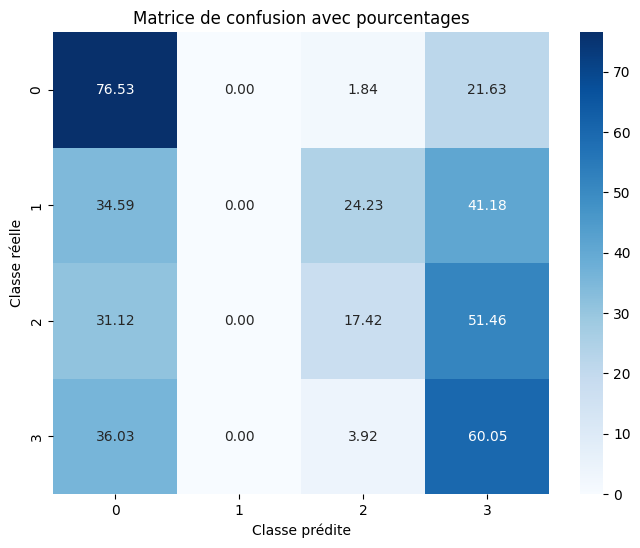

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_log = model_baseline.predict(X_test_selected)

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("Matrice de confusion :\n", conf_matrix_log)

row_sums_log = conf_matrix_log.sum(axis=1)
conf_matrix_percent_log = (conf_matrix_log.T / row_sums_log).T * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent_log, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.title('Matrice de confusion avec pourcentages')
plt.show()

On observe dans la matrice de confusion que le modèle a dû mal à prédire la classe "tué", très certainement car les classes ne sont pas proportionnelles entre elles.

In [ ]:

from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

model_baseline_res = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000))
model_baseline_res.fit(X_train_resampled, y_train_resampled)
accuracy_res = model_baseline_res.score(X_test_selected, y_test)
print("Accuracy :", round(accuracy_res,6))

y_pred = model_baseline_res.predict(X_test_selected)

print(pd.crosstab(y_test, y_pred, colnames=['Predictions']))

print(classification_report_imbalanced(y_test, y_pred))


Accuracy : 0.502819
Predictions      1     2     3      4
grav                                 
1            33332  6287  3208   8170
2              399  2132   606    413
3             2844  7106  4691   4619
4            14265  7624  6004  22088
                   pre       rec       spe        f1       geo       iba       sup

          1       0.66      0.65      0.76      0.65      0.70      0.49     50997
          2       0.09      0.60      0.83      0.16      0.70      0.48      3550
          3       0.32      0.24      0.91      0.28      0.47      0.21     19260
          4       0.63      0.44      0.82      0.52      0.60      0.35     49981

avg / total       0.58      0.50      0.81      0.53      0.63      0.39    123788



In [ ]:
# /!\ avec standar scaler 

model_baseline_log_std = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000))
model_baseline_log_std.fit(X_train_selected_std, y_train)
accuracy_log_std = model_baseline_log_std.score(X_test_selected_std, y_test)
print("Accuracy :", round(accuracy_log_std,6))

Accuracy : 0.584814


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_baseline_rf = RandomForestClassifier(random_state=0)
model_baseline_rf.fit(X_train_selected, y_train)
accuracy_rf = model_baseline_rf.score(X_test_selected, y_test)

print("Accuracy of the baseline Random Forest model:", round(accuracy_rf, 4))

Accuracy of the baseline Random Forest model: 0.6626


In [ ]:
# /!\ avec std

model_baseline_rf_std = RandomForestClassifier(random_state=0)
model_baseline_rf_std.fit(X_train_selected_std, y_train)
accuracy_rf_std = model_baseline_rf_std.score(X_test_selected_std, y_test)

print("Accuracy of the baseline Random Forest model:", round(accuracy_rf_std, 4))

Accuracy of the baseline Random Forest model: 0.663


### Xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_baseline_gb = GradientBoostingClassifier(random_state=0)
model_baseline_gb.fit(X_train_selected, y_train)
accuracy_gb = model_baseline_gb.score(X_test_selected, y_test)

print("Accuracy of the baseline Gradient Boosting model:", round(accuracy_gb, 6))

Accuracy of the baseline Gradient Boosting model: 0.65924


In [ ]:
# /!\ avec std

model_baseline_gb_std = GradientBoostingClassifier(random_state=0)
model_baseline_gb_std.fit(X_train_selected_std, y_train)
accuracy_gb_std = model_baseline_gb_std.score(X_test_selected_std, y_test)

print("Accuracy of the baseline Gradient Boosting model:", round(accuracy_gb_std, 6))

Accuracy of the baseline Gradient Boosting model: 0.65924


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train_selected, y_train)
accuracy_knn = model_knn.score(X_test_selected, y_test)

print("Accuracy of the KNeighborsClassifier model:", round(accuracy_knn, 6))

Accuracy of the KNeighborsClassifier model: 0.591964


In [ ]:
# /!\ avec std

model_knn_std = KNeighborsClassifier(n_neighbors=4)
model_knn_std.fit(X_train_selected_std, y_train)
accuracy_knn_std = model_knn_std.score(X_test_selected_std, y_test)

print("Accuracy of the KNeighborsClassifier model:", round(accuracy_knn_std, 6))

Accuracy of the KNeighborsClassifier model: 0.573182


## Bibiographie :

- base de données : https://www.data.gouv.fr/en/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/#/resources

- documentation : https://www.data.gouv.fr/en/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/#/resources/8ef4c2a3-91a0-4d98-ae3a-989bde87b62a


